In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import random
from math import dist

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def distance(point, data):
  return np.sqrt(np.sum((point - data) ** 2, axis=1))

In [3]:
class KMeans:
    def __init__(self, n_clusters, max_iter, seed=1):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.rand = random.Random(seed)
    
    def fit(self, X):
        self.centroids = [self.rand.choice(X)]
        for _ in range(self.n_clusters-1):
            dists = np.sum([distance(centroid, X) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
            self.centroids += [X[new_centroid_idx]]
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X:
                dists = distance(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = distance(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
    
    def loss(self , X, centroids, centroid_idxs):
        cluster_errors = [0 for _ in range(self.n_clusters)]
        for i, x in enumerate(X):
            cluster_errors[centroid_idxs[i]] += dist(centroids[i] , x)
        for i in range(self.n_clusters):
            cluster_errors[i] /= centroid_idxs.count(i)
        return np.mean(cluster_errors)

1 1.2506218445305037
2 0.29261356790041215
3 0.3519324003393372
4 0.3703745940581157
5 0.3276780962545193
6 0.2970125584841607
7 0.2901757074488504
8 0.29383934197647293
9 0.2878725949740594
10 0.2719784727060383
11 0.22531232397135123
12 0.22928444497229197
13 0.20898708957369022
14 0.1928481724152864
15 0.19417930969108185


Text(0, 0.5, 'Error')

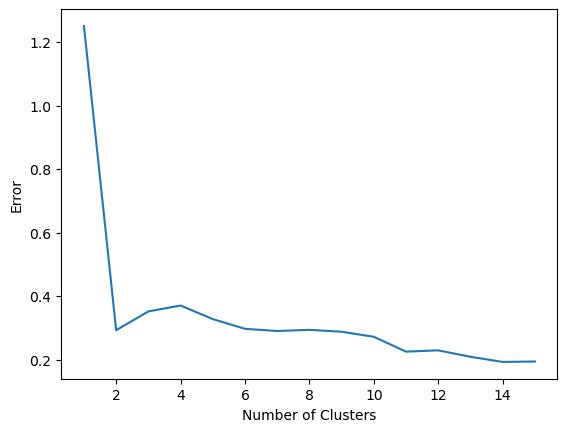

In [4]:
errors = []
for i in range(1 , 16):
    k = i
    x, y = make_blobs(n_samples=1000, centers=k, random_state=1)
    x = StandardScaler().fit_transform(x)
    clf = KMeans(k, 300)
    clf.fit(x)
    centers, classification = clf.evaluate(x)
    error = clf.loss(x , centers, classification)
    print(i , error)
    errors.append(error)
fig, ax = plt.subplots()
ax.plot(np.arange(1 , 16), errors)
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Error")


In [5]:
k = 5
x, y = make_blobs(n_samples=1000, centers=k, random_state=1)
x = StandardScaler().fit_transform(x)

In [6]:
clf = KMeans(k, 300)
clf.fit(x)
centers, classification = clf.evaluate(x)
error = clf.loss(x , centers, classification)

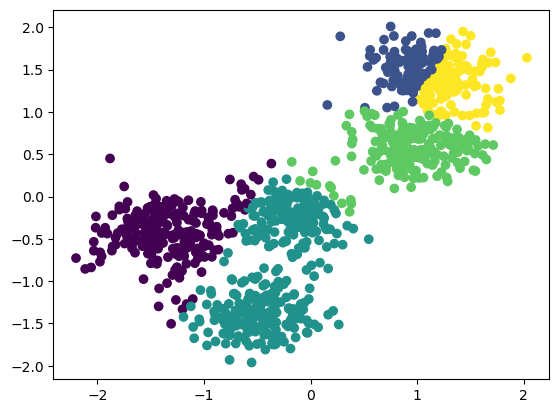

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=[X[0] for X in x], y=[X[1] for X in x], c=classification)